In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df1 = pd.read_excel("D://One Drive Data//7th Semester//Digital Image Processing//My Programs//ML Sem Project//Heart-Disease-Prediction//artifact//Data of Patients with heart condition.xlsx", sheet_name='3-class')

In [12]:
df1.head()
df = df1

In [13]:
columns = ["Class",	"Heart Rate",	"Cholestrol Level",	"Triglycerides Level",	"Fasting Blood Sugar"]
df.columns = columns
df.columns

Index(['Class', 'Heart Rate', 'Cholestrol Level', 'Triglycerides Level',
       'Fasting Blood Sugar'],
      dtype='object')

In [14]:
df.head()

,Class,Heart Rate,Cholestrol Level,Triglycerides Level,Fasting Blood Sugar
0,Nromal,61,126,78,96
1,Nromal,63,125,121,102
2,Nromal,53,111,136,98
3,Nromal,57,117,105,102
4,Nromal,70,100,77,98


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Class                90 non-null     object
 1   Heart Rate           90 non-null     int64 
 2   Cholestrol Level     90 non-null     int64 
 3   Triglycerides Level  90 non-null     int64 
 4   Fasting Blood Sugar  90 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.6+ KB


In [19]:
# Converting all columns to int datatype
for column in df.columns:
    if column!='Class':
        df[column] = df[column].astype('int32')

In [27]:
from sklearn.model_selection import train_test_split
class_mapping = {
'Normal': 0,
'Nromal':0,
'Border Line': 1,
'Borderline': 1,
'High Risk': 2
}

#  Replace values in the 'Class' column based on the mapping
df['Class'] = df['Class'].replace(class_mapping)
x = df.iloc[:,1:]
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



array([1, 2, 0], dtype=int64)

In [30]:
df.isnull().sum() 

Class                  0
Heart Rate             0
Cholestrol Level       0
Triglycerides Level    0
Fasting Blood Sugar    0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:]
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.head()

,Heart Rate,Cholestrol Level,Triglycerides Level,Fasting Blood Sugar
49,86,130,205,113
62,69,187,389,183
73,83,157,393,191
69,91,165,221,131
76,91,179,393,134


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Assuming x and y are defined as in your code
# x = df.iloc[:, 1:]
# y = df.iloc[:, 0]


# Initializing the SVC classifier
svc_classifier = SVC(kernel='linear', random_state=42)  # You can specify different parameters for SVC

# Fitting the classifier on the training data
svc_classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = svc_classifier.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVC: {accuracy}")

Accuracy of SVC: 0.9444444444444444


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


def initiate_training(x_train, x_test, y_train, y_test):
    # SVC Classifier
    svc_classifier = SVC(kernel='rbf', random_state=42)
    svc_classifier.fit(x_train, y_train)
    y_pred_svc = svc_classifier.predict(x_test)
    accuracy_svc = accuracy_score(y_test, y_pred_svc)
    print(f"Accuracy of SVC: {accuracy_svc}")

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred_rf = rf_classifier.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy of Random Forest: {accuracy_rf}")

    # KNN Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(x_train, y_train)
    y_pred_knn = knn_classifier.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"Accuracy of KNN: {accuracy_knn}")


initiate_training(x_train, x_test, y_train, y_test)

Accuracy of SVC: 1.0


Accuracy of Random Forest: 1.0
Accuracy of KNN: 1.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming x_train, x_test, y_train, y_test are loaded with data

def initiate_training(x_train, x_test, y_train, y_test):
    # SVC Classifier
    svc_classifier = SVC(kernel='rbf', random_state=42)
    svc_classifier.fit(x_train, y_train)
    y_pred_svc = svc_classifier.predict(x_test)
    accuracy_svc = accuracy_score(y_test, y_pred_svc)
    print(f"Accuracy of SVC: {accuracy_svc}")

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred_rf = rf_classifier.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy of Random Forest: {accuracy_rf}")

    # Neural Network Model
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))  # Input layer with 8 neurons
    model.add(Dense(10, activation='relu'))  # Hidden layer 1 with 6 neurons
    model.add(Dense(10, activation='relu'))  # Hidden layer 2 with 4 neurons
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for 3 classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define EarlyStopping callback
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model with EarlyStopping callback
    model.fit(x_train, y_train, epochs=500, batch_size=10, verbose=1, callbacks=[early_stop])

    # Evaluate the model
    _, accuracy_nn = model.evaluate(x_test, y_test)
    print(f"Accuracy of Neural Network: {accuracy_nn}")

initiate_training(x_train, x_test, y_train, y_test)


Accuracy of SVC: 1.0
Accuracy of Random Forest: 1.0
Epoch 1/500
8/8 [==============================] - 2s 7ms/step - loss: 21.1031 - accuracy: 0.3194
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 13.4912 - accuracy: 0.3333
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 9.7077 - accuracy: 0.5556
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 7.8720 - accuracy: 0.5694
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 6.3989 - accuracy: 0.5556
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 5.0870 - accuracy: 0.5417
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 3.7872 - accuracy: 0.5278
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 3.3029 - accuracy: 0.4583
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 2.8909 - accuracy: 0.4722
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 2

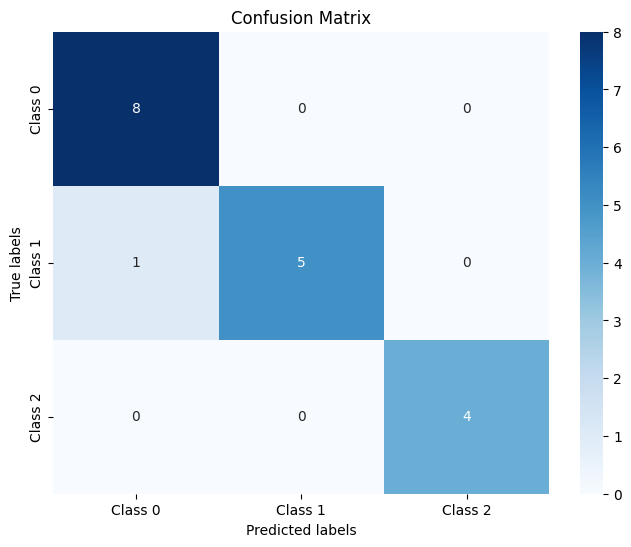

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred contain your actual and predicted labels respectively
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap for a more visually appealing display
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
